<a href="https://colab.research.google.com/github/boodie04/Supervised_ML/blob/main/Cancer1/regression%20using%204%20Diff%20Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORTS**

In [ ]:

import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers, losses, optimizers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

##tf.config.run_functions_eagerly(True)



### **UPLOAD DATA**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024 (1).csv


In [ ]:
print(uploaded.keys())


dict_keys(['global_cancer_patients_2015_2024 (1).csv'])


### READ THE CSV **FILE**

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['global_cancer_patients_2015_2024 (1).csv']))
df


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


### **DATA PRE-PROCESSING**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # <-- fill NaNs with mean
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Cancer_Stage']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:

# ✅ Scale y
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# ✅ Split after scaling
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Print shapes first for clarity
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (40000, 27)
X_test shape: (10000, 27)
y_train shape: (40000, 3)
y_test shape: (10000, 3)


In [ ]:
print(np.isnan(y_train).sum())      # count NaNs
print(np.nanmin(y_train, axis=0))   # min ignoring NaNs
print(np.nanmax(y_train, axis=0))   # max ignoring NaNs
print(np.nanmean(y_train, axis=0))  # mean ignoring NaNs


0
[-3.34360686 -1.73472664 -1.73636127]
[3.5083072  1.73711284 1.73187892]
[ 0.00211442 -0.00133895 -0.00406027]


In [ ]:
# Print sample data
print("\nSample X_train:")
print(X_train[:5].toarray() if hasattr(X_train, "toarray") else X_train[:5])

print("\nSample y_train:")
print(y_train[:5])



Sample X_train:
[[0.07246377 0.59       0.04       0.24       0.88       0.44
  0.         1.         0.         0.         0.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [0.95652174 0.01       0.11       0.37       0.12       0.6
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.        ]
 [0.71014493 0.2        0.25       0.66       0.37       0.11
  1.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.        ]
 [0.1884058  0.27       0.57       0.62       0.4        0.92
  0.         0.         1.         0.         0.         0.
  1.         0.         0.  

### **MODEL BUILDER FUNCTION**

In [ ]:
# --- Model Builder ---
def build_model(optimizer):
    model = Sequential([
        tf.keras.Input(shape=(X_train.shape[1],)),  # ✅ Replaces input_shape warning
        Dense(128, activation='relu', kernel_initializer='he_normal'),
        #BatchNormalization(),
        #Dropout(0.3),

        Dense(128, activation='relu', kernel_initializer='he_normal'),
        #BatchNormalization(),
        #Dropout(0.3),

        Dense(128, activation='relu', kernel_initializer='he_normal'),
        #Dropout(0.2),

        Dense(3, activation='linear')  # Multivariate regression
    ])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


### EARLY STOP **SETTINGS**

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)


### **SGD OPT**

In [ ]:
# ✅ SGD Optimizer
sgd_optimizer = SGD(learning_rate=0.001, momentum=0.8)
sgd_model = build_model(sgd_optimizer)
history_sgd = sgd_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)


Epoch 1/50
 304/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0786 - mae: 0.8696

KeyboardInterrupt: 

### **ADAM OPT**

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
adam_model = build_model(adam_optimizer)
history_adam = adam_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1, callbacks=[early_stop])

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9030 - mae: 0.7900 - val_loss: 0.7695 - val_mae: 0.7262
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7525 - mae: 0.7159 - val_loss: 0.7623 - val_mae: 0.7225
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7442 - mae: 0.7110 - val_loss: 0.7593 - val_mae: 0.7209
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7366 - mae: 0.7078 - val_loss: 0.7584 - val_mae: 0.7201
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.7369 - mae: 0.7081 - val_loss: 0.7569 - val_mae: 0.7196
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7324 - mae: 0.7058 - val_loss: 0.7547 - val_mae: 0.7187
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7316 - mae: 0.7043 - val_loss: 0.7552 - val_mae: 0.7190
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7265 - mae: 0.7021 - val_loss: 0.7556 - val_mae: 0.7190
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━

### **RMS OPT**

In [ ]:
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
rmsprop_model = build_model(rmsprop_optimizer)
history_rmsprop = rmsprop_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.9287 - mae: 0.8055 - val_loss: 0.7752 - val_mae: 0.7303
Epoch 2/50
 860/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7582 - mae: 0.7205

KeyboardInterrupt: 

### **ADAGRAD OPT**

In [ ]:
adagrad_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.0001)
adagrad_model = build_model(adagrad_optimizer)
history_adagrad = adagrad_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1388 - mae: 0.8886 - val_loss: 1.0325 - val_mae: 0.8543
Epoch 2/50
 386/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.0394 - mae: 0.8564

KeyboardInterrupt: 

### **PLOT FUNCTION**

In [ ]:
def plot_history(history, optimizer_name):
    plt.figure(figsize=(12, 6))

    # MSE
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{optimizer_name} - Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(f'{optimizer_name} - MAE per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

# **SINGLE PLOT**

## SGD **PLOT**

In [ ]:
plot_history(history_sgd, "SGD")

## ADAM **PLOT**

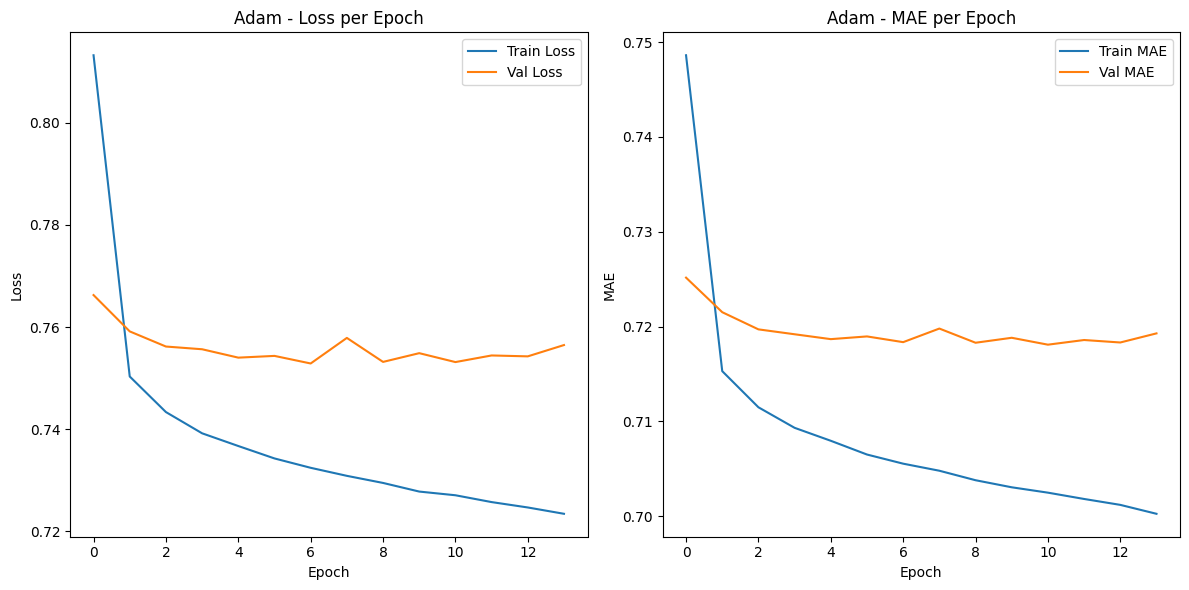

In [ ]:
plot_history(history_adam, "Adam")

## **RMS PLOT**

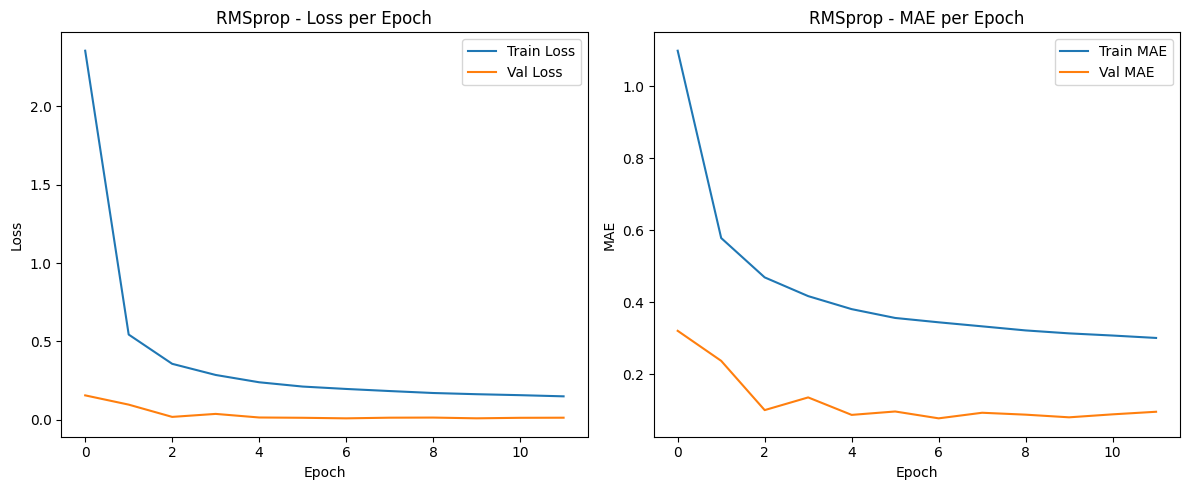

In [ ]:
plot_history(history_rmsprop, "RMSprop")

## **ADAGRAD PLOT**

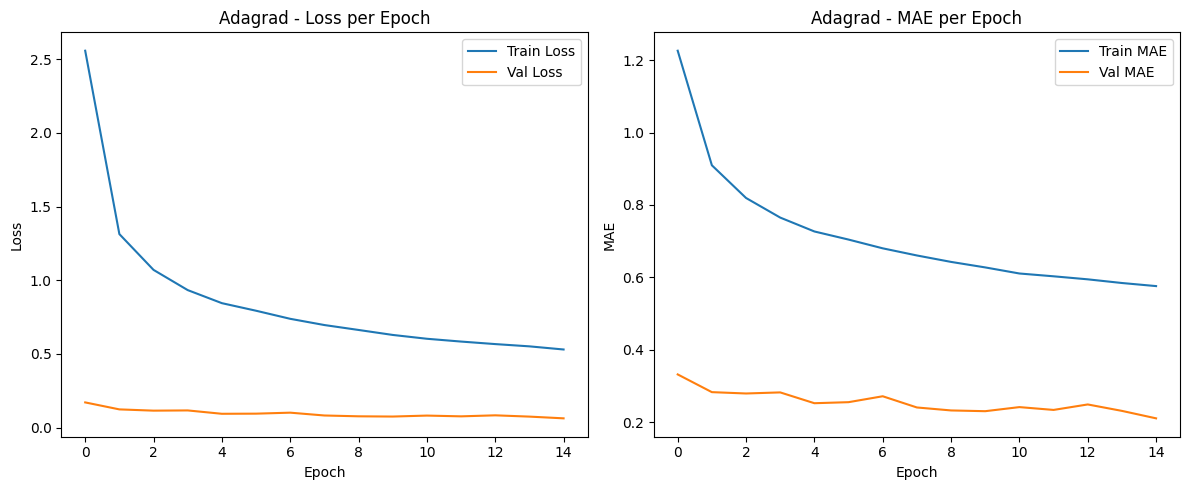

In [ ]:
plot_history(history_adagrad, "Adagrad")

# **EVALUATE MODEL**

In [ ]:
def evaluate_model(model, X_test, y_test, name):
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    print(f"{name} - Test MSE: {mse:.4f}, MAE: {mae:.4f}")

evaluate_model(sgd_model, X_test, y_test, "SGD")
evaluate_model(adam_model, X_test, y_test, "Adam")
evaluate_model(rmsprop_model, X_test, y_test, "RMSprop")
evaluate_model(adagrad_model, X_test, y_test, "Adagrad")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
SGD - Test MSE: 0.0172, MAE: 0.0897
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Adam - Test MSE: 0.0037, MAE: 0.0421
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
RMSprop - Test MSE: 0.0095, MAE: 0.0777
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Adagrad - Test MSE: 0.0631, MAE: 0.2105
